In [60]:
### Random forest works well when there are missing information
# Load the library with the iris dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn .preprocessing import LabelEncoder, OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# visual your data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set random seed
np.random.seed(0)

In [22]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
#print(iris)  # this allows us to see the info in the iris database

In [36]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
# Select X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [38]:
# Transforming text to an array of number
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
#print(y)

#y = pd.factorize(df.iloc[:, 4].values) # this is a different way to do the conversion from text to array

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [39]:
### Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [40]:
# Fitting the Model
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [42]:
# Predicting the Test set results
y_pred=clf.predict(X_test)
#print(y_pred)

In [54]:
print('Accuracy is =', accuracy_score(y_test, y_pred)*100)
# Confusion matrix
print('\n Confusion matrix is = \n', confusion_matrix(y_test, y_pred))
# Confusion matrix metrics
print('\n Confusion matrix metrix is = \n',classification_report(y_test, y_pred))

Accuracy is = 95.55555555555556

 Confusion matrix is = 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]

 Confusion matrix metrix is = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
### Additional analysis and visualization

In [47]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(X_test)]
preds[0:5]

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica'],
      dtype='<U10')

In [50]:
# View the ACTUAL species for the first five observations on test data
preds_test = iris.target_names[y_test]
preds_test[0:5]

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica'],
      dtype='<U10')

In [51]:
# Create confusion matrix but with names (use pandas library to do this)
pd.crosstab(preds_test, preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,16,0,0
versicolor,0,10,1
virginica,0,1,17


Text(0.5, 103.73999999999997, 'Predicted label')

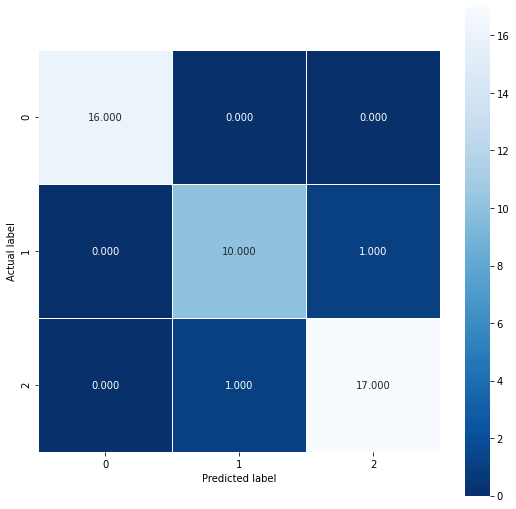

In [62]:
# Othere way to show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
# Making a prediction on real data
preds = iris.target_names[clf.predict( [[5.0, 3.6, 1.4, 2.0],[3.0, 1.6, 4.4, 3.9]])]
preds

array(['setosa', 'virginica'], dtype='<U10')